In [87]:
import numpy as np
import pandas as pd
import os

import warnings
warnings.filterwarnings("ignore")


In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
training_data=pd.read_csv("/content/drive/MyDrive/modified_training_data.csv")

In [90]:
print("The size of modified training dataset is", training_data.shape)

The size of modified training dataset is (29692, 27)


In [91]:
training_data.head()

,Unnamed: 0,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,total_proppant,total_fluid,true_vertical_depth,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,0,1383493.751,717329.2368,1382854.564,712767.3700,1121.0,3963.582677,76000.0000,2.219894e+06,8712.598425,...,Standalone Well,Batch-Sequential Frac,Standalone Well,Primary Frac,13.333333,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1,1380344.035,711916.2732,1379738.429,707860.5643,1022.0,3179.133858,113000.0000,5.610964e+05,8627.952756,...,Outer Well,Batch-Sequential Frac,Infill Child Well,Primary Frac,34.666667,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,2,1379915.895,717845.0063,1379274.644,713471.9952,1304.0,3810.039370,286571.4286,1.621424e+06,8801.181102,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.000000,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,3,1383567.443,706640.2010,1382891.477,702068.3838,1022.0,3723.425197,106878.9286,4.377134e+05,8635.826772,...,Standalone Well,Batch-Concurrent Frac,Standalone Well,Primary Frac,32.666667,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,4,1378962.585,702623.9787,1379643.546,707204.9131,1022.0,3811.023622,112789.7143,6.229802e+05,8664.370079,...,Outer Well,Batch-Concurrent Frac,Infill Child Well,Primary Frac,33.333333,1379546.414,705150.7519,1379987.487,707123.7258,102.309540


In [92]:
training_data.columns

Index(['Unnamed: 0', 'surface_x', 'surface_y', 'bh_x', 'bh_y',
       'standardized_operator_name', 'gross_perforated_length',
       'total_proppant', 'total_fluid', 'true_vertical_depth', 'ffs_frac_type',
       'proppant_intensity', 'frac_fluid_intensity',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'pad_id', 'relative_well_position',
       'batch_frac_classification', 'well_family_relationship', 'frac_type',
       'frac_seasoning', 'horizontal_midpoint_x', 'horizontal_midpoint_y',
       'horizontal_toe_x', 'horizontal_toe_y', 'OilPeakRate'],
      dtype='object')

In [95]:
columns_to_drop = ['Unnamed: 0']

In [96]:
training_data = training_data.drop(columns=columns_to_drop)

In [97]:
print("The size of modified training dataset after droping unnamed columns is", training_data.shape)

The size of modified training dataset after droping unnamed columns is (29692, 26)


In [98]:
training_data.head()

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,total_proppant,total_fluid,true_vertical_depth,ffs_frac_type,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,1383493.751,717329.2368,1382854.564,712767.3700,1121.0,3963.582677,76000.0000,2.219894e+06,8712.598425,Slickwater Linear Hybrid,...,Standalone Well,Batch-Sequential Frac,Standalone Well,Primary Frac,13.333333,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1380344.035,711916.2732,1379738.429,707860.5643,1022.0,3179.133858,113000.0000,5.610964e+05,8627.952756,Slickwater Crosslink Hybrid,...,Outer Well,Batch-Sequential Frac,Infill Child Well,Primary Frac,34.666667,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,1379915.895,717845.0063,1379274.644,713471.9952,1304.0,3810.039370,286571.4286,1.621424e+06,8801.181102,Crosslink Only,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.000000,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,1383567.443,706640.2010,1382891.477,702068.3838,1022.0,3723.425197,106878.9286,4.377134e+05,8635.826772,Slickwater Crosslink Hybrid,...,Standalone Well,Batch-Concurrent Frac,Standalone Well,Primary Frac,32.666667,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,1378962.585,702623.9787,1379643.546,707204.9131,1022.0,3811.023622,112789.7143,6.229802e+05,8664.370079,Slickwater Crosslink Hybrid,...,Outer Well,Batch-Concurrent Frac,Infill Child Well,Primary Frac,33.333333,1379546.414,705150.7519,1379987.487,707123.7258,102.309540


In [99]:
training_data.columns

Index(['surface_x', 'surface_y', 'bh_x', 'bh_y', 'standardized_operator_name',
       'gross_perforated_length', 'total_proppant', 'total_fluid',
       'true_vertical_depth', 'ffs_frac_type', 'proppant_intensity',
       'frac_fluid_intensity', 'proppant_to_frac_fluid_ratio',
       'frac_fluid_to_proppant_ratio', 'bin_lateral_length', 'pad_id',
       'relative_well_position', 'batch_frac_classification',
       'well_family_relationship', 'frac_type', 'frac_seasoning',
       'horizontal_midpoint_x', 'horizontal_midpoint_y', 'horizontal_toe_x',
       'horizontal_toe_y', 'OilPeakRate'],
      dtype='object')

In [100]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     29692 non-null  float64
 1   surface_y                     29692 non-null  float64
 2   bh_x                          29692 non-null  float64
 3   bh_y                          29692 non-null  float64
 4   standardized_operator_name    29692 non-null  float64
 5   gross_perforated_length       29692 non-null  float64
 6   total_proppant                29692 non-null  float64
 7   total_fluid                   29692 non-null  float64
 8   true_vertical_depth           29692 non-null  float64
 9   ffs_frac_type                 29692 non-null  object 
 10  proppant_intensity            29692 non-null  float64
 11  frac_fluid_intensity          29692 non-null  float64
 12  proppant_to_frac_fluid_ratio  29692 non-null  float64
 13  f

In [101]:
print("The columns having no null values:")
null_col=[]
for col in training_data.columns:
    if(training_data[col].isnull().sum()!=0):
        null_col.append(col)
    else:
        print(col)

The columns having no null values:
surface_x
surface_y
bh_x
bh_y
standardized_operator_name
gross_perforated_length
total_proppant
total_fluid
true_vertical_depth
ffs_frac_type
proppant_intensity
frac_fluid_intensity
proppant_to_frac_fluid_ratio
frac_fluid_to_proppant_ratio
bin_lateral_length
pad_id
relative_well_position
batch_frac_classification
well_family_relationship
frac_type
frac_seasoning
horizontal_midpoint_x
horizontal_midpoint_y
horizontal_toe_x
horizontal_toe_y


In [102]:
for col in null_col:
    print("No of Null values in ",col,training_data[col].isnull().sum())

No of Null values in  OilPeakRate 10386


In [103]:
cat_col=[]
num_col=[]
for col in training_data.columns:
    if(training_data[col].dtypes=='object'):
        cat_col.append(col)
    else:
        num_col.append(col)

In [104]:
print("No of categorical columns ",len(cat_col),"\n",cat_col)

No of categorical columns  5 
 ['ffs_frac_type', 'relative_well_position', 'batch_frac_classification', 'well_family_relationship', 'frac_type']


In [105]:
print(num_col)

['surface_x', 'surface_y', 'bh_x', 'bh_y', 'standardized_operator_name', 'gross_perforated_length', 'total_proppant', 'total_fluid', 'true_vertical_depth', 'proppant_intensity', 'frac_fluid_intensity', 'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio', 'bin_lateral_length', 'pad_id', 'frac_seasoning', 'horizontal_midpoint_x', 'horizontal_midpoint_y', 'horizontal_toe_x', 'horizontal_toe_y', 'OilPeakRate']


In [106]:
for col in cat_col:
    print("No of unique values in ",col,len(training_data[col].value_counts()),"\n")

No of unique values in  ffs_frac_type 5 

No of unique values in  relative_well_position 3 

No of unique values in  batch_frac_classification 3 

No of unique values in  well_family_relationship 3 

No of unique values in  frac_type 3 



In [107]:
for col in cat_col:
    print("Unique values of\n",training_data[col].value_counts(),"\n")

Unique values of
 Slickwater Only                10973
Slickwater Crosslink Hybrid     9756
Slickwater Linear Hybrid        6726
Crosslink Only                  2062
Linear Only                      175
Name: ffs_frac_type, dtype: int64 

Unique values of
 Standalone Well    12917
Outer Well          9379
Inner Well          7396
Name: relative_well_position, dtype: int64 

Unique values of
 Non-Batch Frac           14429
Batch-Concurrent Frac     9571
Batch-Sequential Frac     5692
Name: batch_frac_classification, dtype: int64 

Unique values of
 Standalone Well      12960
Sibling Well         10857
Infill Child Well     5875
Name: well_family_relationship, dtype: int64 

Unique values of
 Primary Frac       29602
Refrac                89
Protection Frac        1
Name: frac_type, dtype: int64 



#DATA VISUALIZATION:

##1. Correlation Matrix

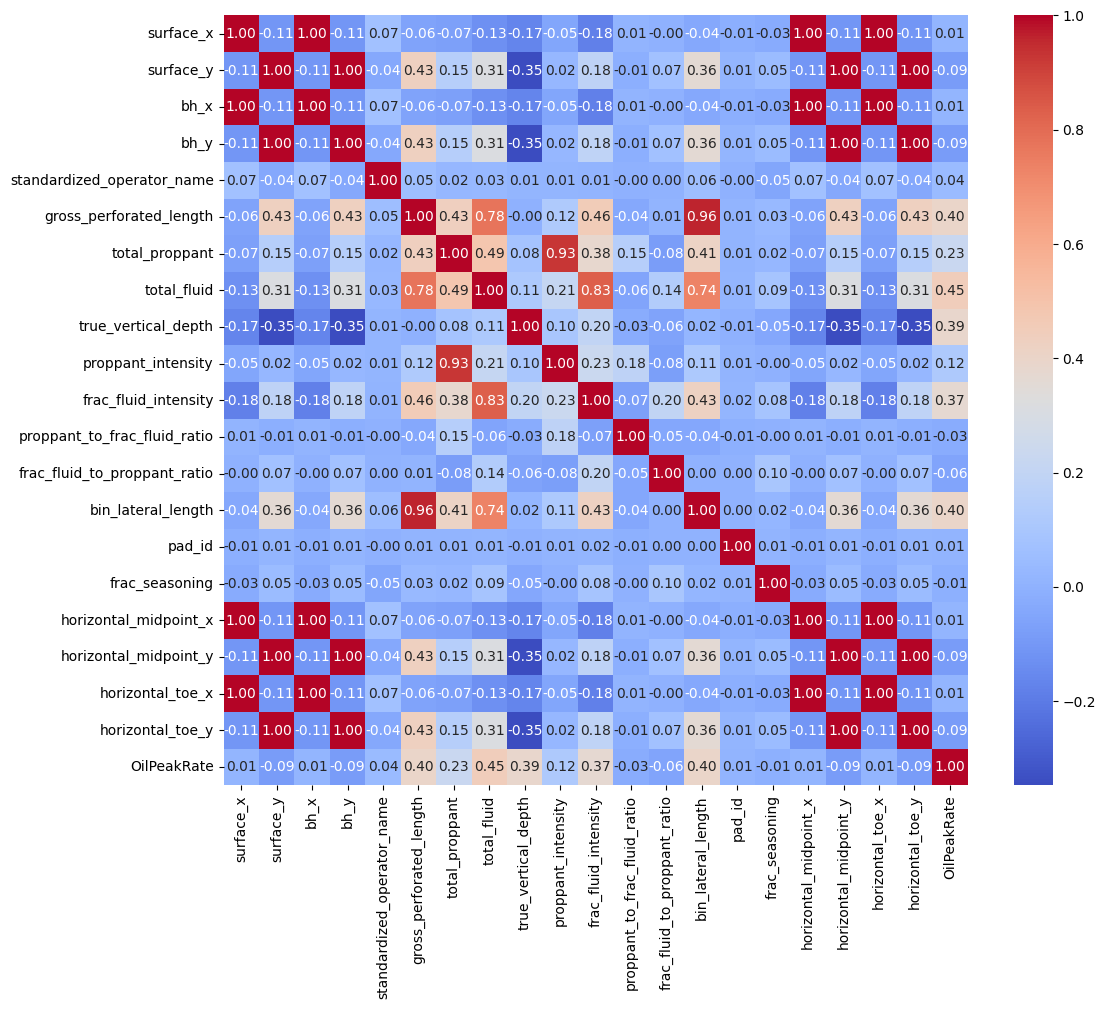

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = training_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [109]:
numeric_columns = training_data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
  correlation_matrix = training_data[numeric_columns].corrwith(training_data[col])
  filtered_correlations = correlation_matrix[abs(correlation_matrix) > 0.5]
  print("=======",col,"======\n",filtered_correlations)

======= surface_x ======
 surface_x                1.000000
bh_x                     0.999096
horizontal_midpoint_x    0.999760
horizontal_toe_x         0.999103
dtype: float64
======= surface_y ======
 surface_y                1.000000
bh_y                     0.999919
horizontal_midpoint_y    0.999986
horizontal_toe_y         0.999949
dtype: float64
======= bh_x ======
 surface_x                0.999096
bh_x                     1.000000
horizontal_midpoint_x    0.999731
horizontal_toe_x         0.999917
dtype: float64
======= bh_y ======
 surface_y                0.999919
bh_y                     1.000000
horizontal_midpoint_y    0.999955
horizontal_toe_y         0.999965
dtype: float64
======= standardized_operator_name ======
 standardized_operator_name    1.0
dtype: float64
======= gross_perforated_length ======
 gross_perforated_length    1.000000
total_fluid                0.776096
bin_lateral_length         0.961122
dtype: float64
======= total_proppant ======
 total_proppant  

In [110]:
numerical_feature = [feature for feature in training_data.columns if training_data[feature].dtypes != 'O']

print("Total numerical Features : ",len(numerical_feature))

training_data[numerical_feature].head()

Total numerical Features :  21


,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,...,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,pad_id,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,1383493.751,717329.2368,1382854.564,712767.3700,1121.0,3963.582677,76000.0000,2.219894e+06,8712.598425,19.174572,...,0.222156,6.299301,1.0,102604.0,13.333333,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1380344.035,711916.2732,1379738.429,707860.5643,1022.0,3179.133858,113000.0000,5.610964e+05,8627.952756,35.544272,...,0.201391,4.965455,1.0,108497.0,34.666667,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,1379915.895,717845.0063,1379274.644,713471.9952,1304.0,3810.039370,286571.4286,1.621424e+06,8801.181102,75.214821,...,0.176741,5.658008,1.0,108526.0,92.000000,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,1383567.443,706640.2010,1382891.477,702068.3838,1022.0,3723.425197,106878.9286,4.377134e+05,8635.826772,28.704465,...,0.244176,4.095414,1.0,105631.0,32.666667,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,1378962.585,702623.9787,1379643.546,707204.9131,1022.0,3811.023622,112789.7143,6.229802e+05,8664.370079,29.595648,...,0.181049,5.523377,1.0,103717.0,33.333333,1379546.414,705150.7519,1379987.487,707123.7258,102.309540


##2. NUMERICAL - Handling Discrete Features

In [111]:
discrete_feature = [feature for feature in numerical_feature if len(training_data[feature].unique())<25]
print("Counts of Dicrete features is {}".format(len(discrete_feature)))

Counts of Dicrete features is 1


In [112]:
discrete_feature

['bin_lateral_length']

In [113]:
training_data['bin_lateral_length'].describe()

count    29692.000000
mean         1.372878
std          0.487662
min          0.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.000000
Name: bin_lateral_length, dtype: float64

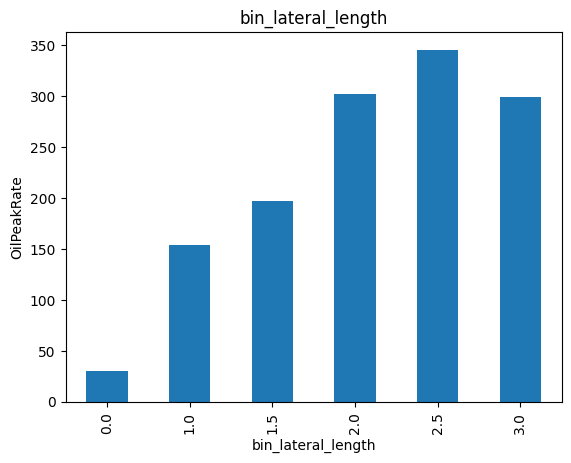

In [121]:
## finding relationship between the discrete features and the OilPeakRate
import matplotlib.pyplot as plt
for feature in discrete_feature:
    data = training_data.copy()
    data.groupby(feature)['OilPeakRate'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("OilPeakRate")
    plt.title(feature)
    plt.show()

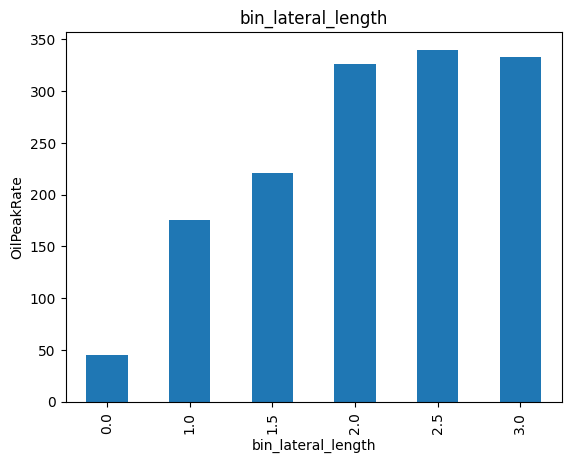

In [115]:
## finding relationship between the discrete features and the OilPeakRate
import matplotlib.pyplot as plt
for feature in discrete_feature:
    data = training_data.copy()
    data.groupby(feature)['OilPeakRate'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("OilPeakRate")
    plt.title(feature)
    plt.show()

##3. Numerical - Continuous Variables

In [144]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
len(continuous_feature)

20

In [145]:
continuous_feature

['surface_x',
 'surface_y',
 'bh_x',
 'bh_y',
 'standardized_operator_name',
 'gross_perforated_length',
 'total_proppant',
 'total_fluid',
 'true_vertical_depth',
 'proppant_intensity',
 'frac_fluid_intensity',
 'proppant_to_frac_fluid_ratio',
 'frac_fluid_to_proppant_ratio',
 'pad_id',
 'frac_seasoning',
 'horizontal_midpoint_x',
 'horizontal_midpoint_y',
 'horizontal_toe_x',
 'horizontal_toe_y',
 'OilPeakRate']

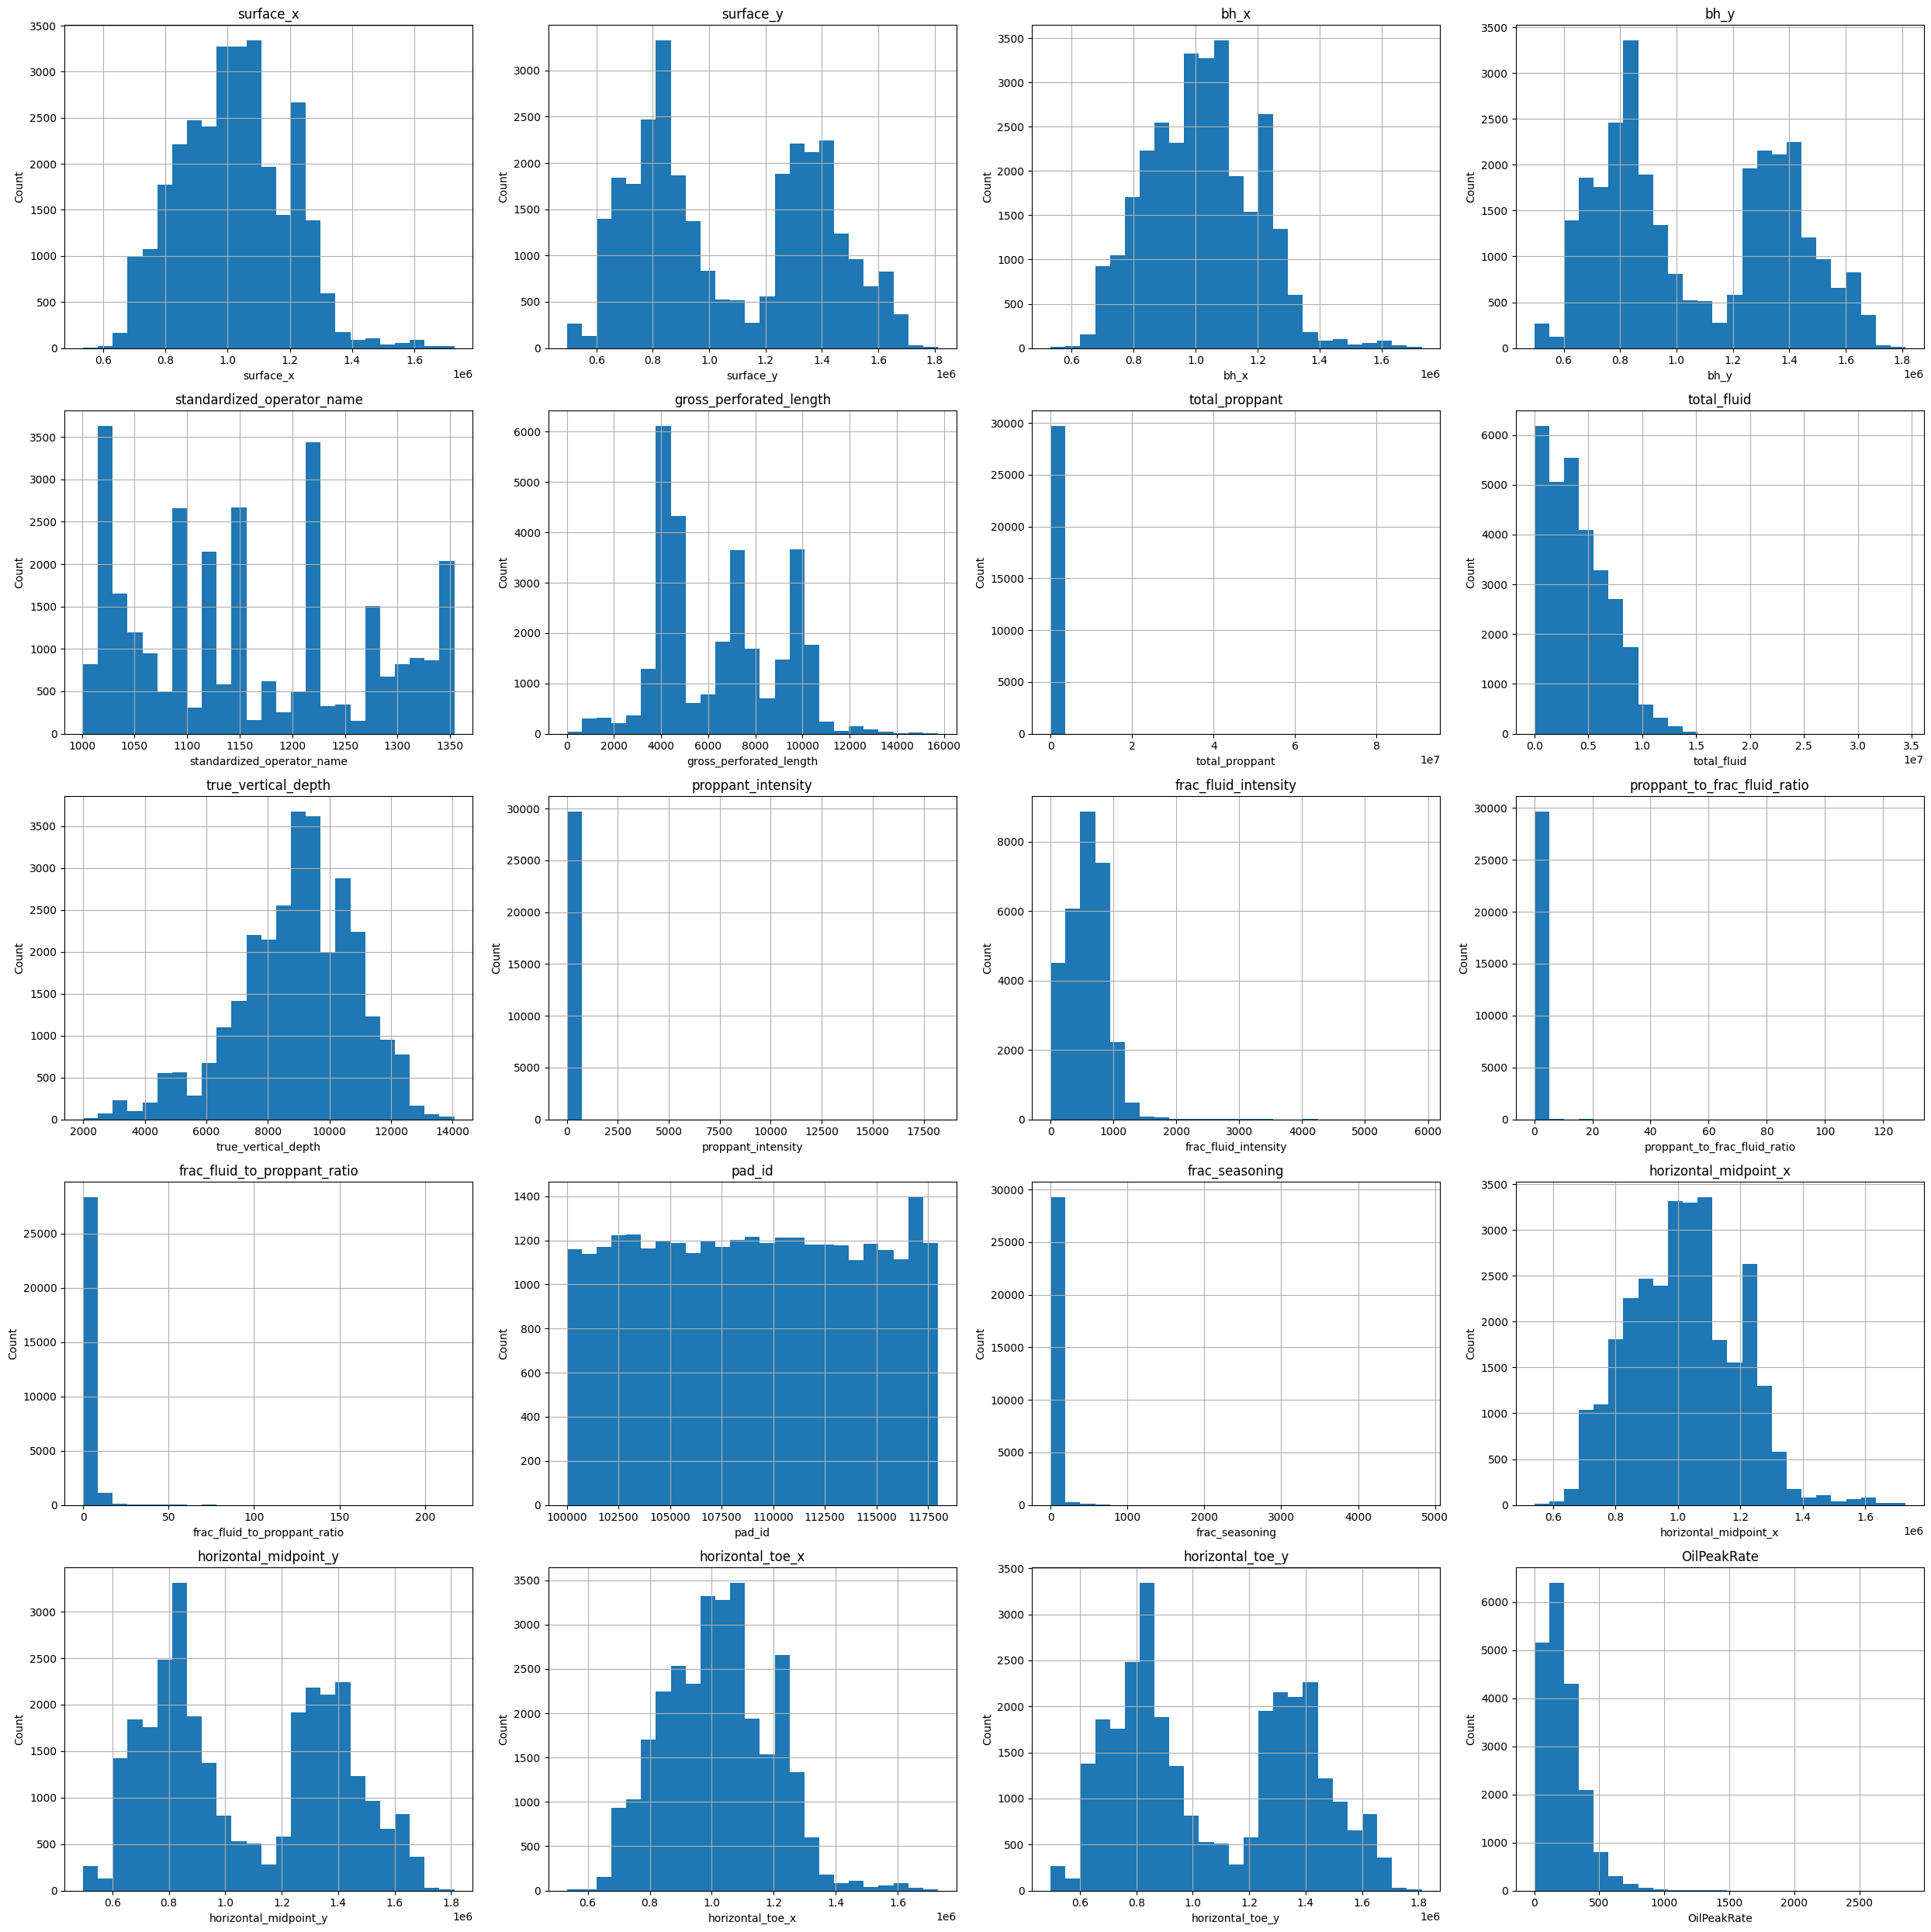

In [118]:
fig, axes = plt.subplots(5, 4, figsize=(25, 25))

axes = axes.flatten()


for i, feature in enumerate(continuous_feature):
    ax = axes[i]


    data = training_data[~np.isinf(training_data[feature])]
    data[feature].hist(bins=25, ax=ax)

    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax.set_title(feature)

plt.tight_layout()
plt.show()

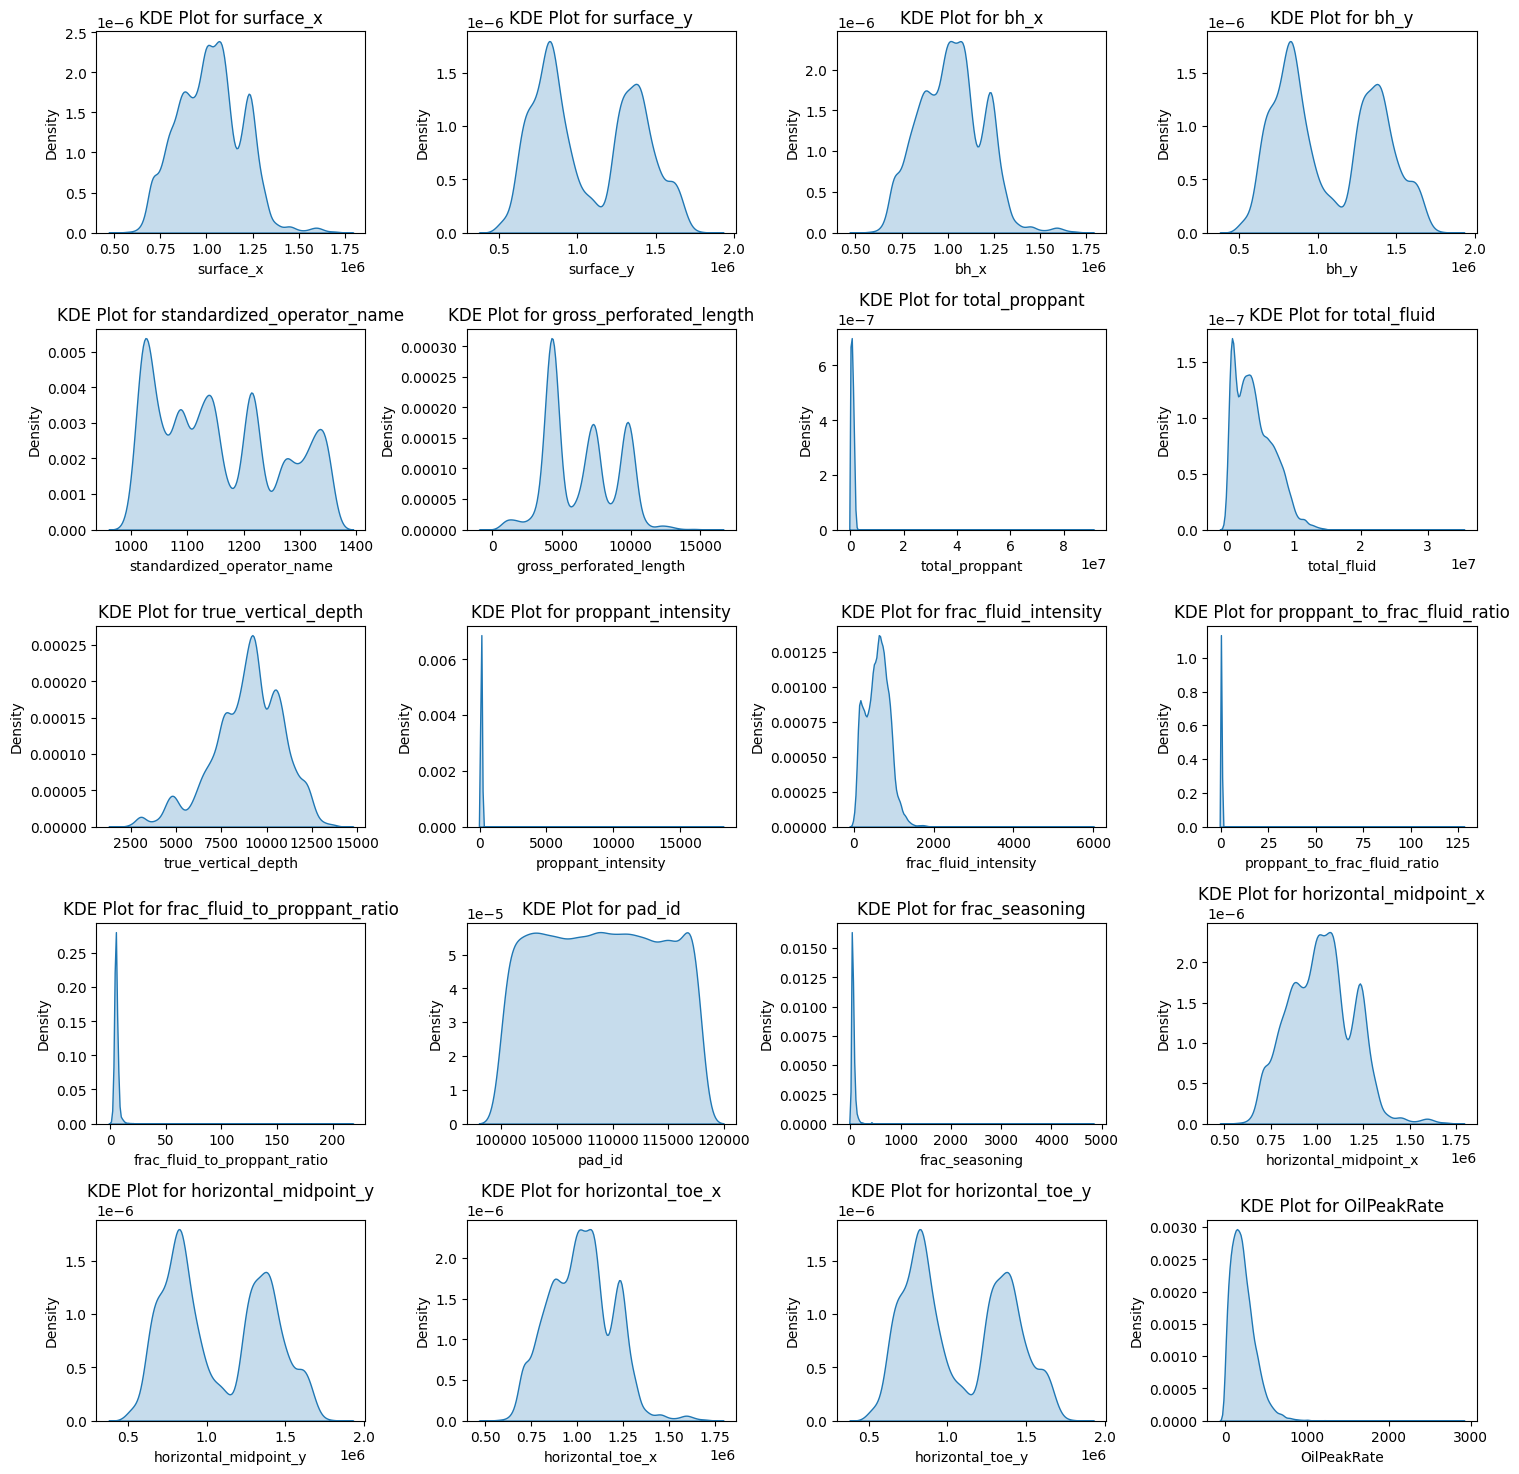

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(5, 4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)


for i, var in enumerate(continuous_feature):
    r,c = divmod(i, 4)
    sns.kdeplot(training_data[var], shade=True, ax=axes[r, c])
    axes[r, c].set_title(f'KDE Plot for {var}')
    axes[r, c].set_xlabel(var)
    axes[r, c].set_ylabel('Density')

plt.tight_layout()
plt.show()


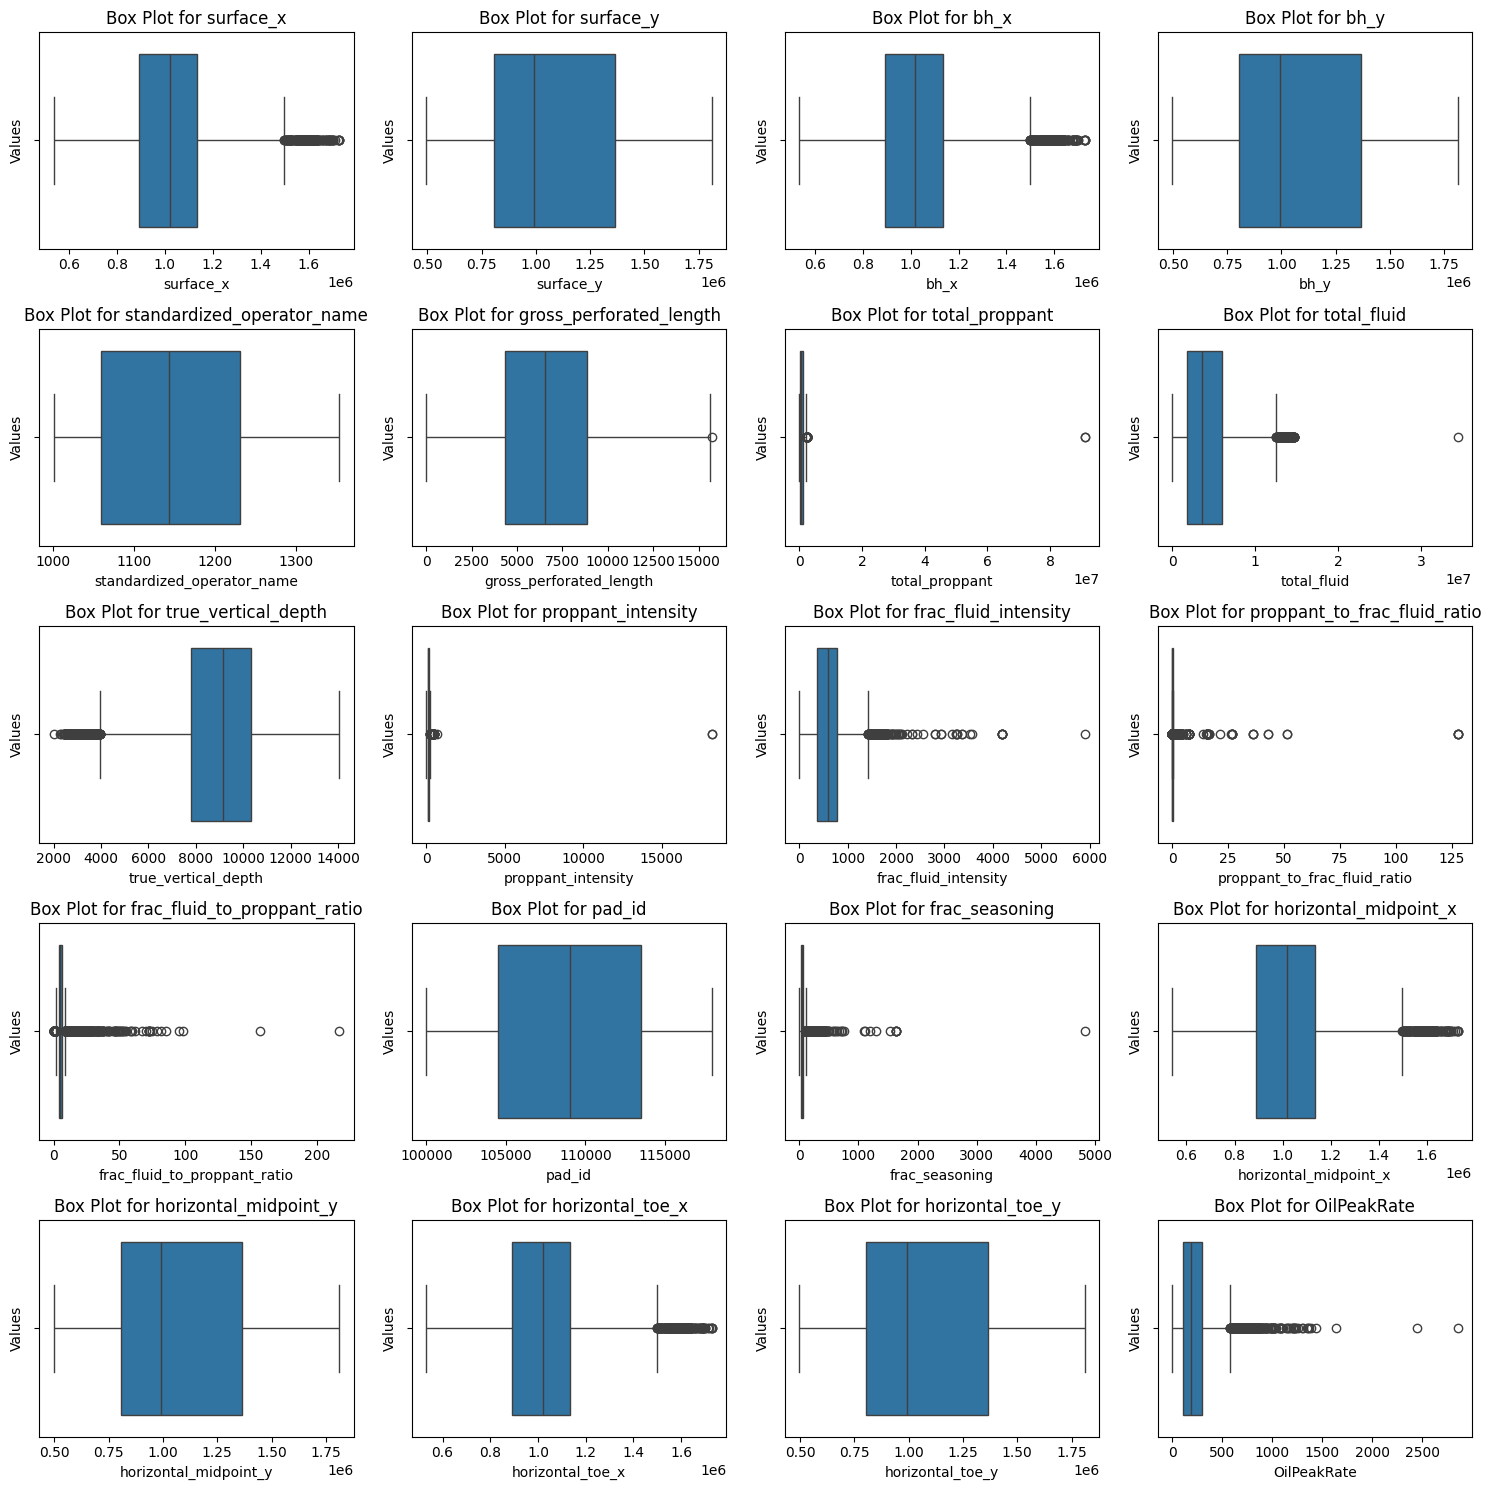

In [133]:
fig, axes = plt.subplots(5, 4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, var in enumerate(continuous_feature):
    row, col = divmod(i, 4)
    sns.boxplot(x=training_data[var], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot for {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Values')

plt.tight_layout()
plt.show()


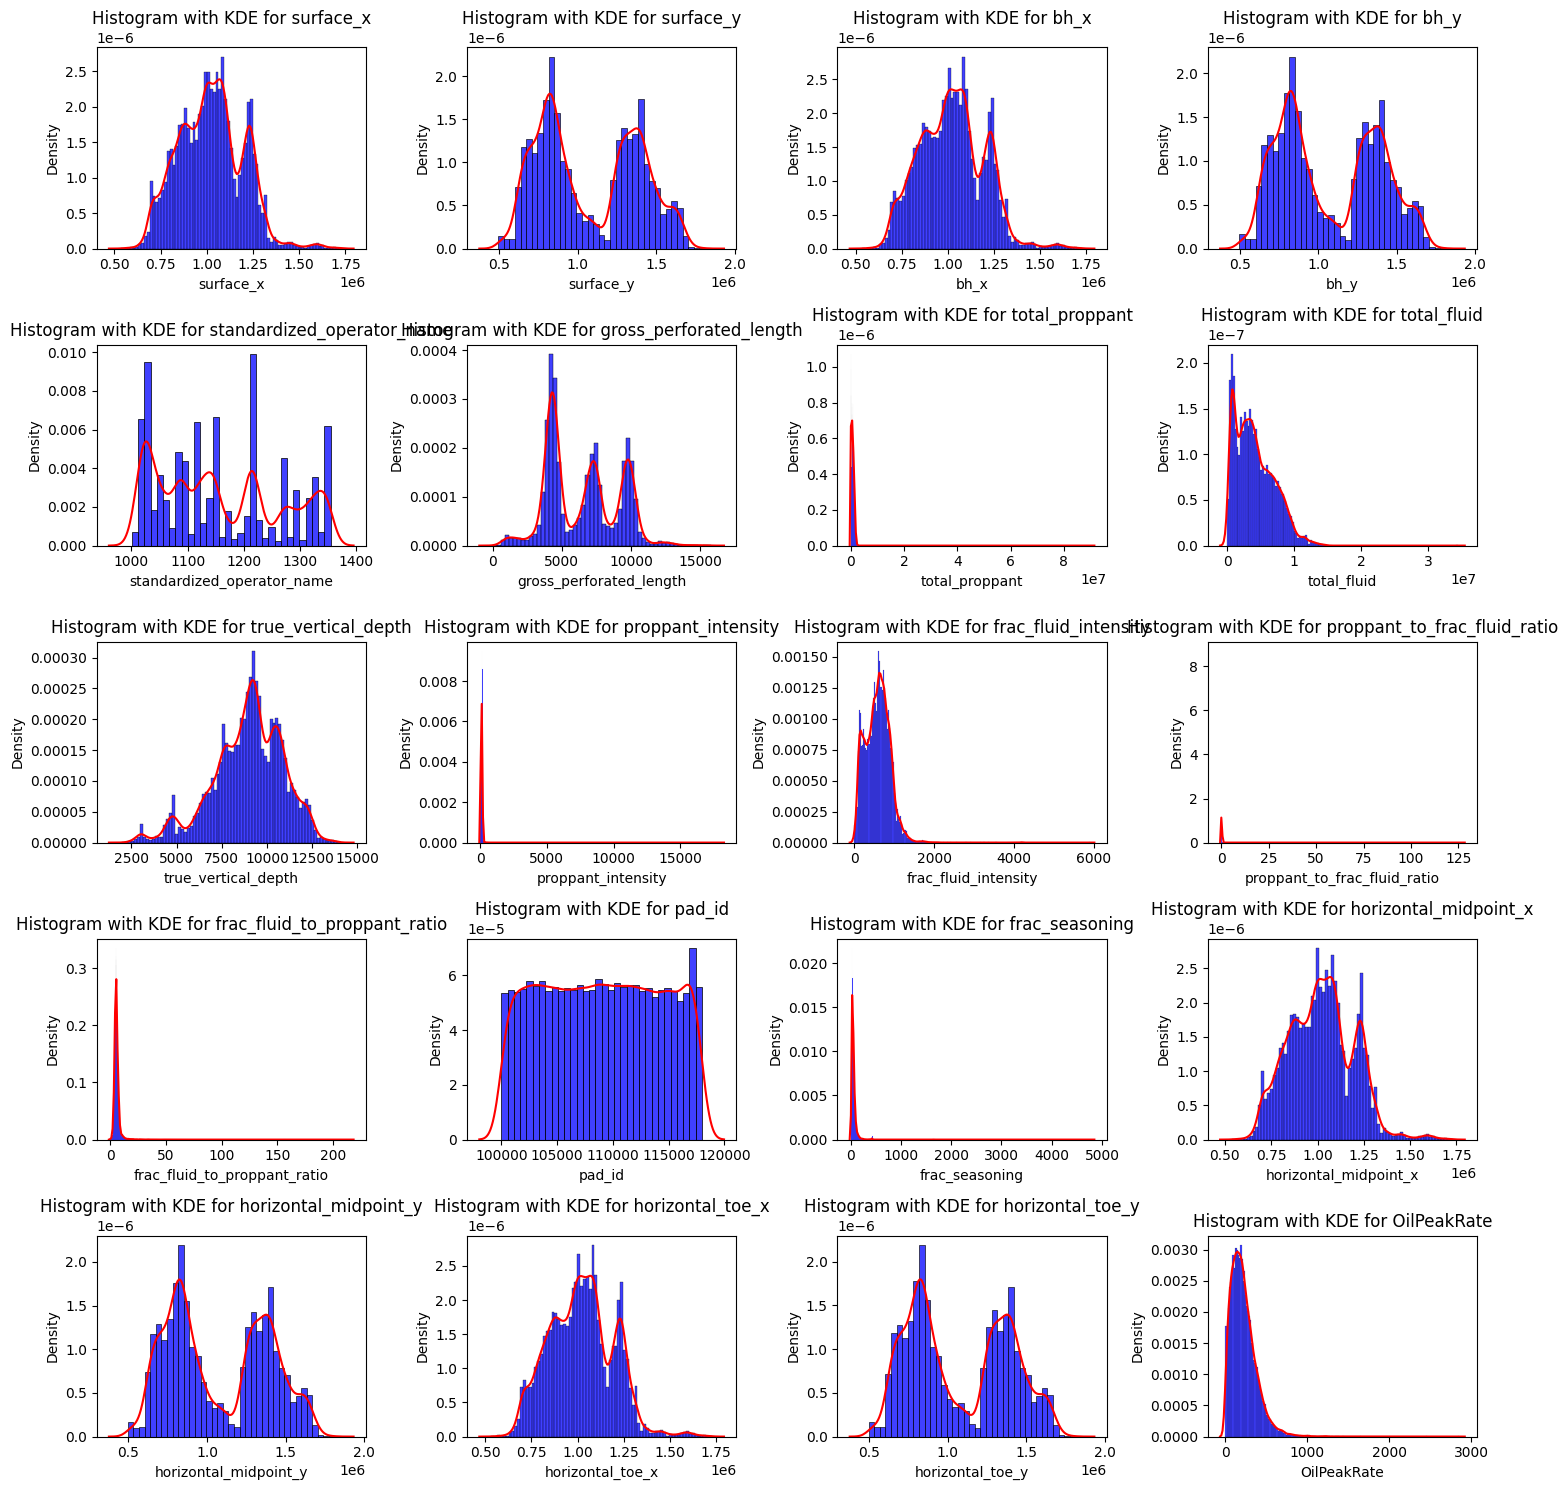

In [148]:
fig, axes = plt.subplots(5, 4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)


for i, var in enumerate(continuous_feature):
    row, col = divmod(i, 4)
    sns.histplot(training_data[var], color='blue', stat='density', ax=axes[row, col])

    sns.kdeplot(training_data[var], color='red', ax=axes[row, col])

    axes[row, col].set_title(f'Histogram with KDE for {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Density')


plt.tight_layout()
plt.show()

##4. Categotical variables

In [122]:
categorical_feature = [feature for feature in training_data.columns if training_data[feature].dtypes == 'O']
len(categorical_feature)

5

In [123]:
categorical_feature

['ffs_frac_type',
 'relative_well_position',
 'batch_frac_classification',
 'well_family_relationship',
 'frac_type']

# Find out the relationship between categorical variable and dependent feature OilPeakRate

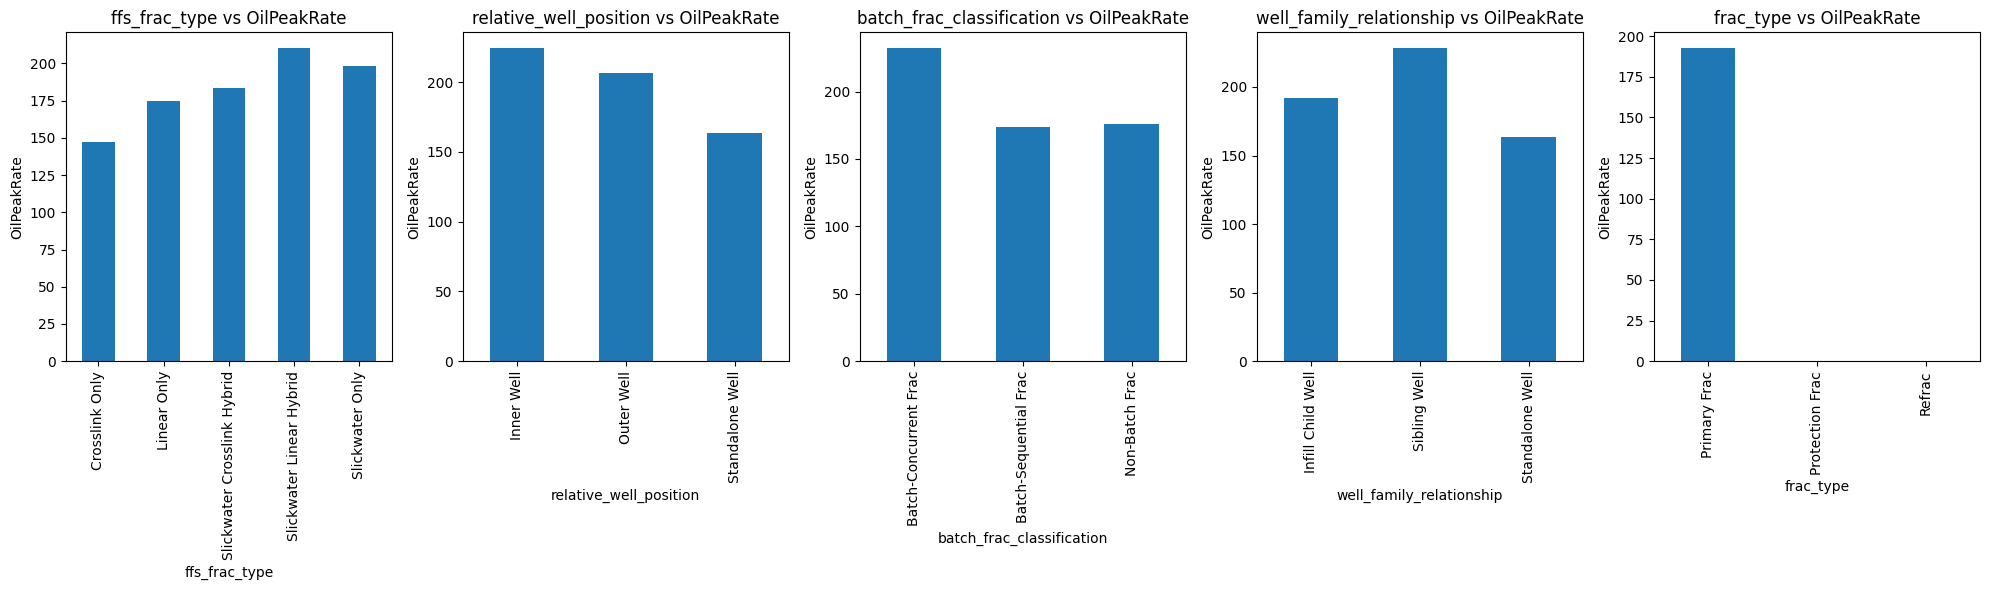

In [124]:
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

for idx, feature in enumerate(categorical_feature):
    data = training_data.copy()

    data.groupby(feature)['OilPeakRate'].median().plot.bar(ax=axes[idx])
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("OilPeakRate")
    axes[idx].set_title('{} vs OilPeakRate'.format(feature))

plt.tight_layout()
plt.show()

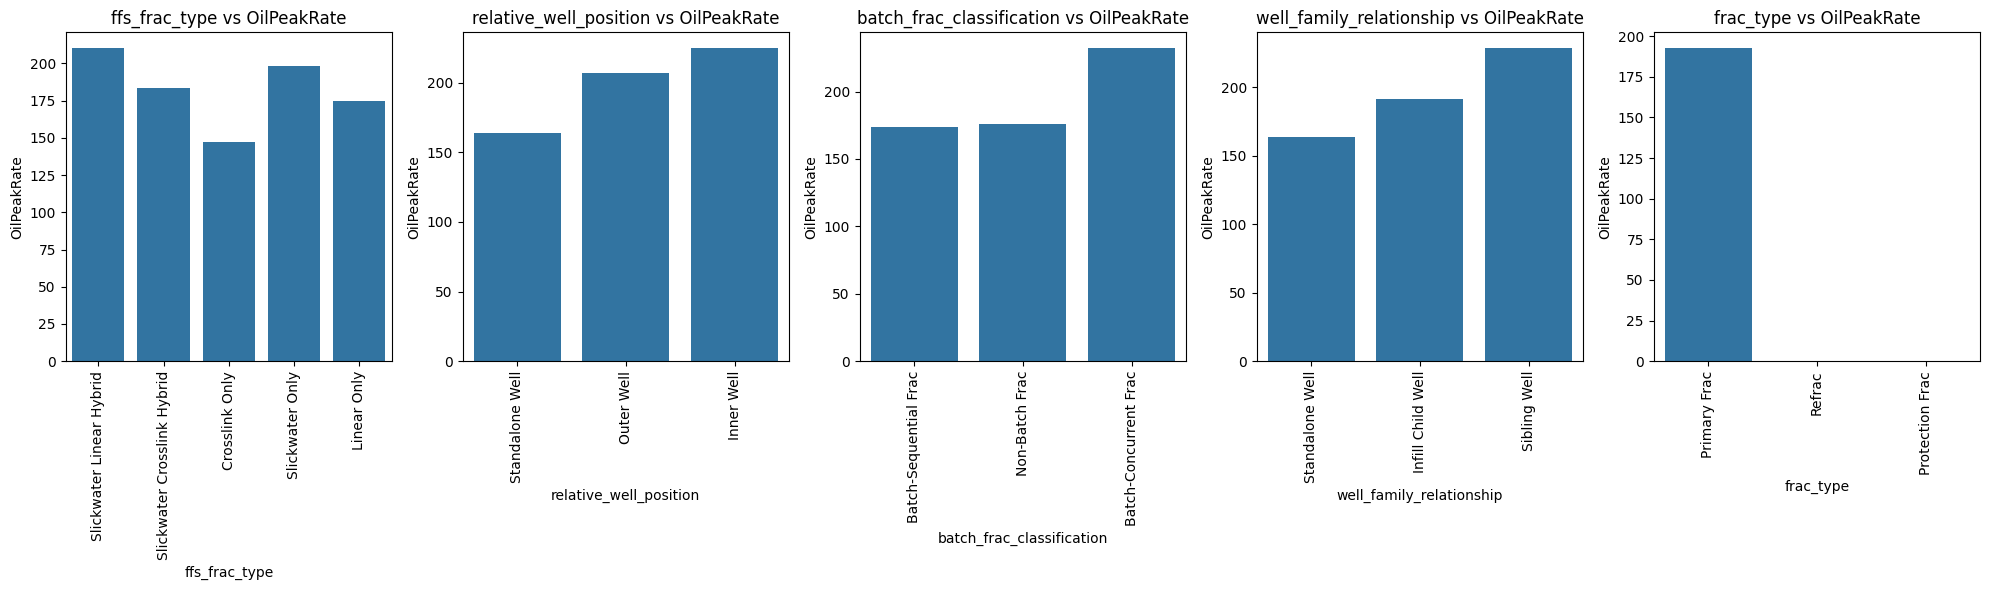

In [125]:
import seaborn as sns
fig, axes = plt.subplots(1, 5, figsize=(20, 6))

for idx, feature in enumerate(categorical_feature):
    data = training_data.copy()
    sns.barplot(x=feature,y='OilPeakRate', data=data, ci=False, estimator=np.median, ax=axes[idx])
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("OilPeakRate")
    axes[idx].set_title('{} vs OilPeakRate'.format(feature))
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [126]:
categorical_feature

['ffs_frac_type',
 'relative_well_position',
 'batch_frac_classification',
 'well_family_relationship',
 'frac_type']

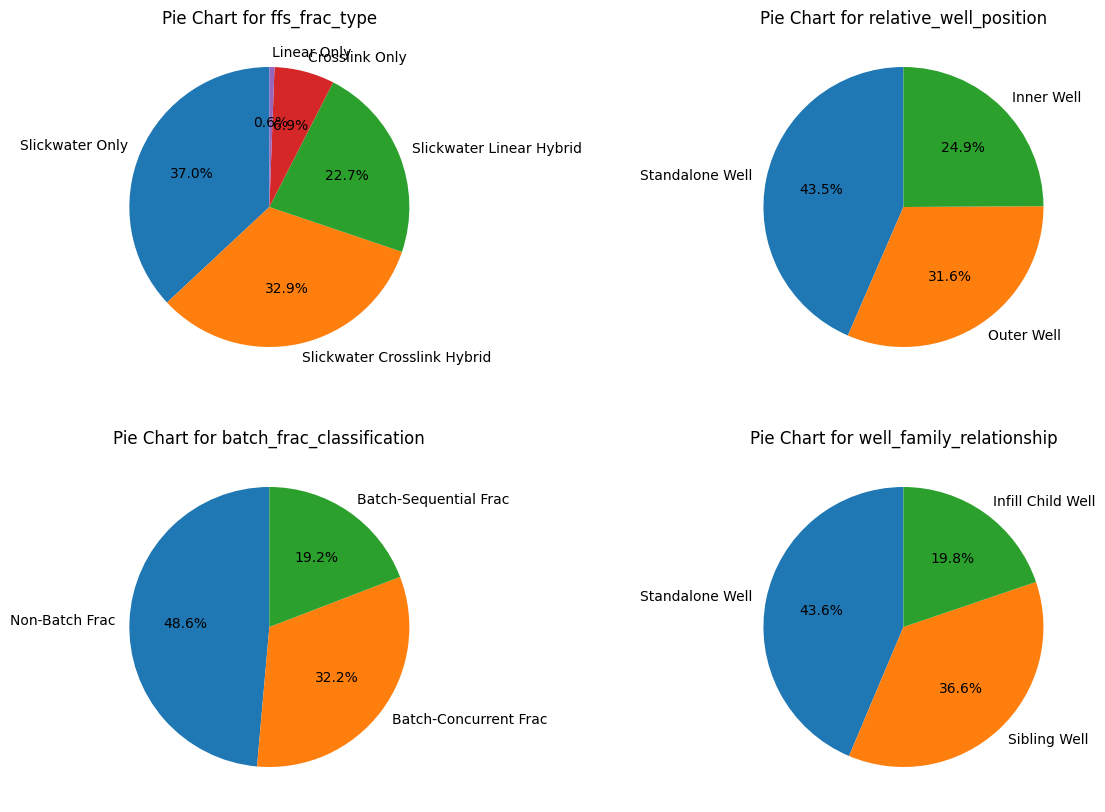

In [127]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, column_name in enumerate(categorical_feature):
    if i < 4:
        value_counts = training_data[column_name].value_counts()


        axes[i//2, i%2].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        axes[i//2, i%2].set_title('Pie Chart for {}'.format(column_name))

plt.show()


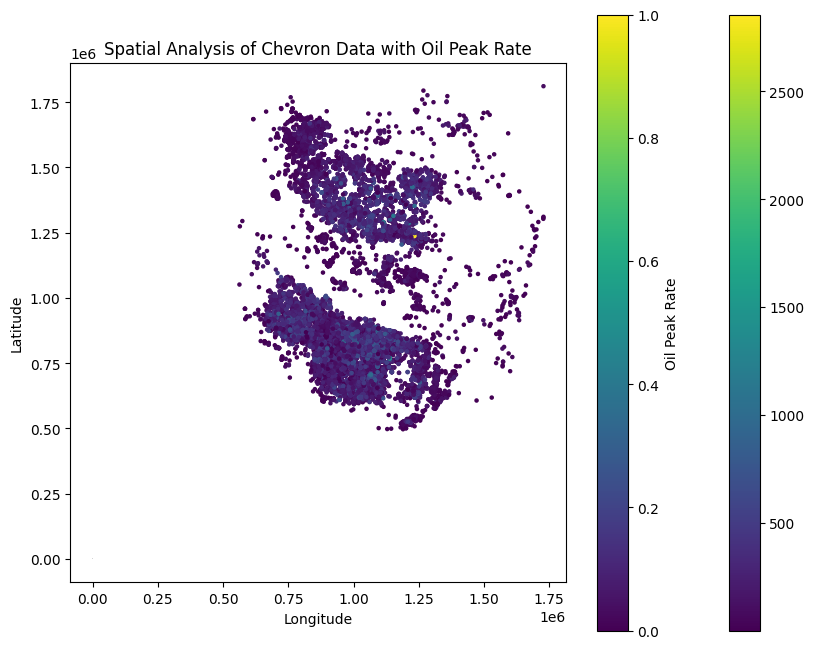

In [161]:
import geopandas as gpd

spatial_columns = ['surface_x', 'surface_y', 'bh_x', 'bh_y']
highlight_column = 'OilPeakRate'

gdf = gpd.GeoDataFrame(training_data, geometry=gpd.points_from_xy(training_data['surface_x'], training_data['surface_y']))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 8))

world.plot(ax=ax, color='lightgrey')

gdf.plot(ax=ax, column=highlight_column, cmap='viridis', markersize=5, legend=True)
plt.title('Spatial Analysis of Chevron Data with Oil Peak Rate')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar(ax.collections[0], label='Oil Peak Rate')

plt.show()


# Findings & Analysis

## 1. Correlation Matrix:

### i) It can be seen a high correlation between total_proppant and proppant intensity with a value of 0.93, which means the correlation suggests that as the total amount of proppant used increases, the intensity of proppant application per foot of lateral also tends to increase. By this we can consider that it indicate a constant proppant application strategy across different wells.

### ii) It also seems to be a high corelation between gross_preforted_length and bin_lateral length with a value of 0.96, which implies it could indicate that longer lateral lengths are associated with a greater vertical distance between the top and bottom perforations. This may have geological or engineering implications in terms of well design and production.

### iii) The correlation between total_fluid and frac_fluid_intensity having a correlation of 0.83 means that this aspect is valuable for resource allocation and planning in oil and gas extraction operations.

### iv) Having a correlation of 0.78 between gross_perforted_length and total_fluid, that implies wells with longer perforated lengths might require more fluid to ensure effective fracturing across the entire length.

### v) With a value of 0.74 as the correlation between bin_lateral_length and total fluid, it is suggested that investigating how changes in lateral length or fluid volume impact oil production rates (OilPeakRate) could be valuable.


## 2. NUMERICAL - Handling Discrete Features:

 ### From the bar plot between binlateral_length and OilPeakRate we can see that as the bin_lateral_length goes from 0 to 2.5 there is a increase in the OilPeakRate which implies the positive relationship observed in the bar plot suggests that bin_lateral_length could be an important feature for predicting OilPeakRate. Including this feature in the model may enhance its accuracy.

 ## 4. Categotical variables:

 ### With the helps of the plots between the Categorical variables ('ffs_frac_type', 'relative_well_position', 'batch_frac_classification', 'well_family_relationship', 'frac_type') with OilPeakRate, we can see imporatnce of considering 'ffs_frac_type', 'relative_well_position', 'batch_frac_classification' for accurate interpretation and decision-making.







